<a href="https://colab.research.google.com/github/samyff12/Modelos-estadisticos/blob/main/Lab2-Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2
## Regresión lineal múltiple


## Actividad 1
### Distribuciones no centrales

### $\chi^2$ no central

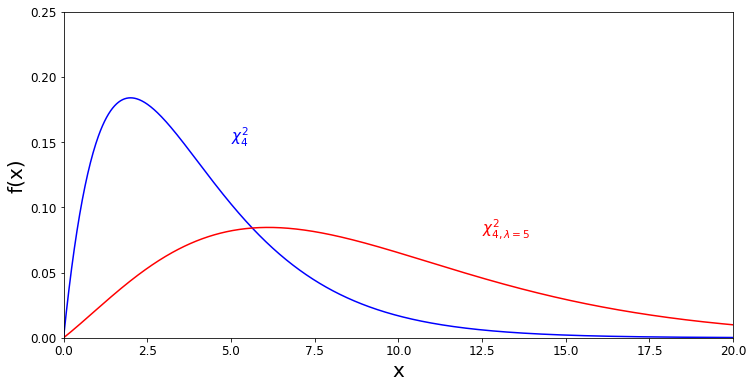

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2 
from scipy.stats import ncx2

v = 4 # Grados de libertad
nc = 5 # Parámetro de no centralidad

df = pd.DataFrame({'x': np.linspace(0.001, 20, 1000)})
df['chi_c'] = chi2.pdf(df.x, v)
df['chi_nc'] = ncx2.pdf(df.x, v, nc)

plt.figure(figsize=(12,6))
plt.plot(df.x, df.chi_c, color="Blue")
plt.text(5, 0.15, r'$\chi^2_4$', size=15, color="Blue")
plt.plot(df.x, df.chi_nc, color="Red")
plt.text(12.5, 0.08, r'$\chi^2_{4, \lambda=5}$', size=15, color="Red")
plt.xlim([0, 20])
plt.ylim([0, 0.25])
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.show()


### $F$ no central


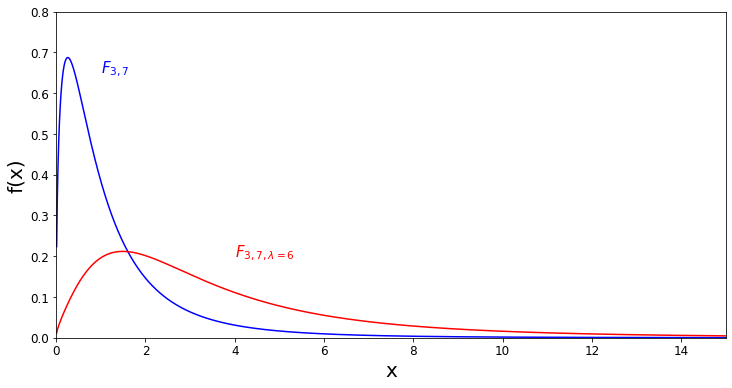

In [25]:
from scipy.stats import f
from scipy.stats import ncf

v1 = 3 # Grados de libertad de numerador
v2 = 7 # Grados de libertad de denominador
nc = 6 # Parámetro de no centralidad

df = pd.DataFrame({'x': np.linspace(0.01, 15, 1000)})
df['f_c'] = f.pdf(df.x, v1, v2)
df['f_nc'] = ncf.pdf(df.x, v1, v2, nc)

plt.figure(figsize=(12,6))
plt.plot(df.x, df.f_c, color="Blue")
plt.text(1, 0.65, r'$F_{3,7}$', size=15, color="Blue")
plt.plot(df.x, df.f_nc, color="Red")
plt.text(4, 0.2, r'$F_{3,7, \lambda=6}$', size=15, color="Red")
plt.xlim([0, 15])
plt.ylim([0, 0.80])
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.show()




### $t$-Student no central

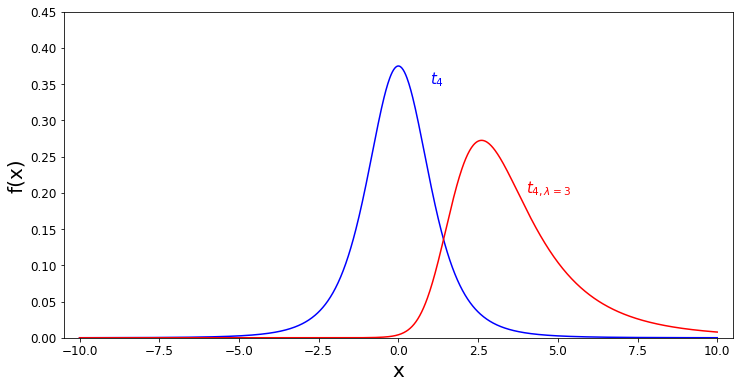

In [26]:
from scipy.stats import t
from scipy.stats import nct

v = 4 # Grados de libertad
nc = 3 # Parámetro de no centralidad

df = pd.DataFrame({'x': np.linspace(-10, 10, 1000)})
df['t_c'] = t.pdf(df.x, v)
df['t_nc'] = nct.pdf(df.x, v, nc)

plt.figure(figsize=(12,6))
plt.plot(df.x, df.t_c, color="Blue")
plt.text(1, 0.35, r'$t_4$', size=15, color="Blue")
plt.plot(df.x, df.t_nc, color="Red")
plt.text(4, 0.2, r'$t_{4, \lambda=3}$', size=15, color="Red")
plt.xlim([-10.5, 10.5])
plt.ylim([0, 0.45])
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.show()

## Actividad 2
### Leyendo los datos
Tomados del ejemplo 7.2 de Rencher (p. 140)


,y,x1,x2
0,2,0,2
1,3,2,6
2,2,2,7
3,7,2,5
4,6,4,9
5,8,4,8
6,10,4,7
7,7,6,10
8,8,6,11
9,12,6,9


               y         x1       x2
count  12.000000  12.000000  12.0000
mean    7.500000   4.333333   8.5000
std     3.872983   2.534609   3.5291
min     2.000000   0.000000   2.0000
25%     5.250000   2.000000   6.7500
50%     7.500000   4.000000   8.5000
75%    10.250000   6.000000  10.2500
max    14.000000   8.000000  15.0000


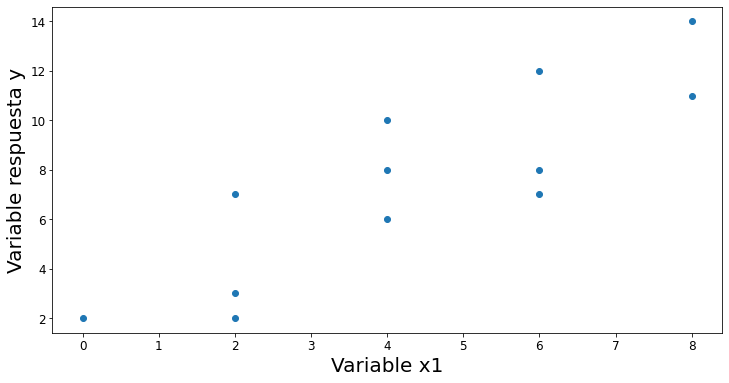

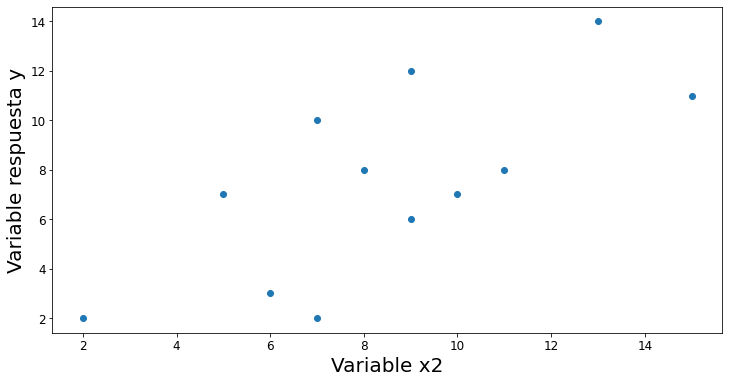

In [27]:
df = pd.DataFrame({
  'y': [2,3,2,7,6,8,10,7,8,12,11,14],
  'x1': [0,2,2,2,4,4,4,6,6,6,8,8],
  'x2': [2,6,7,5,9,8,7,10,11,9,15,13]
})
display(df)
print(df.describe())

plt.figure(figsize=(12,6))
plt.scatter(df.x1, df.y)
plt.xlabel('Variable x1', fontsize=20)
plt.ylabel('Variable respuesta y', fontsize=20)
plt.show()
plt.figure(figsize=(12,6))
plt.scatter(df.x2, df.y)
plt.xlabel('Variable x2', fontsize=20)
plt.ylabel('Variable respuesta y', fontsize=20)
plt.show()


Text(0.5, 0, 'y')

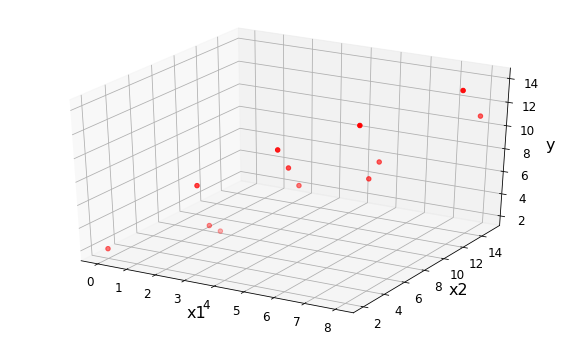

In [28]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.x2, df.y, color='Red')
ax.set_xlabel('x1', fontsize=16)
ax.set_ylabel('x2', fontsize=16)
ax.set_zlabel('y', fontsize=16)

### y ~ x1

Omnibus: H$_0: $ Los residuos están normalmente distribuidos

Skew (Asimetría). En una distribución normal es cero. $<0$ indican datos sesgados a la izquierda, $>0$, sesgados a la derecha.

Kurtosis (Curtosis). Si es positiva indica una distribución de "cola pesada" y si es negativa indica una distribución de "cola ligera".

Durbin-Watson. Si es un valor pequeño ($<1$) indica que los términos de error sucesivos están correlacionados positivamente. $>2$, los sucesivos términos de error están correlacionados negativamente. 

Jarque-Bera. H$_0: $ Los residuos están normalmente distribuidos.

Cond. No. En presencia de multicolinealidad se espera ver un número relativamente pequeño ($<30$).

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     26.48
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           0.000434
Time:                        16:03:45   Log-Likelihood:                -24.988
No. Observations:                  12   AIC:                             53.98
Df Residuals:                      10   BIC:                             54.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8585      1.256      1.479      0.1

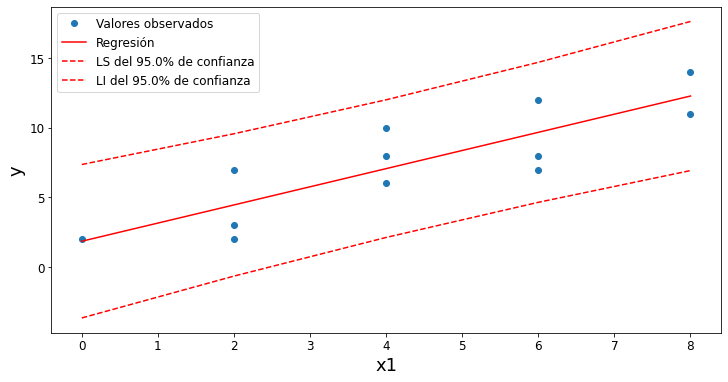

In [31]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

alpha = 0.05
mod1 = sm.ols('y ~ x1', data=df.sort_values(by=['x1'])).fit()
print(mod1.summary(alpha=alpha), "\n") # para cambiar nivel de significancia

prstd, iv_l, iv_u = wls_prediction_std(mod1, alpha=alpha)

plt.figure(figsize=(12,6))
plt.plot(df.x1, df.y, 'o', label="Valores observados")
plt.plot(df.x1, mod1.fittedvalues, 'r-', label="Regresión")
plt.plot(df.x1, iv_u, 'r--',
         label="LS del "+ str((1-alpha)*100) + "% de confianza")
plt.plot(df.x1, iv_l, 'r--', 
         label="LI del "+ str((1-alpha)*100) + "% de confianza")
plt.legend(loc='best')
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.show()



### y ~ x2


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sun, 16 Jan 2022   Prob (F-statistic):            0.00943
Time:                        16:51:27   Log-Likelihood:                -28.516
No. Observations:                  12   AIC:                             61.03
Df Residuals:                      10   BIC:                             62.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
Intercept      0.8613      2.230      0.386      0.7

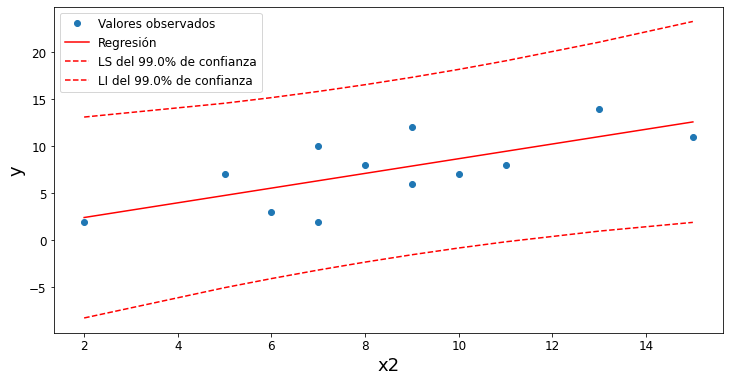

In [38]:
alpha = 0.01
df_ord = df.sort_values(by=['x2'])
mod2 = smf.ols('y ~ x2', data=df_ord).fit()
print(mod2.summary(alpha=alpha), "\n")

prstd, iv_l, iv_u = wls_prediction_std(mod2, alpha=alpha)

plt.figure(figsize=(12,6))
plt.plot(df_ord.x2, df_ord.y, 'o', label="Valores observados")
plt.plot(df_ord.x2, mod2.fittedvalues, 'r-', label="Regresión")
plt.plot(df_ord.x2, iv_u, 'r--',
         label="LS del "+ str((1-alpha)*100) + "% de confianza")
plt.plot(df_ord.x2, iv_l, 'r--', 
         label="LI del "+ str((1-alpha)*100) + "% de confianza")
plt.legend(loc='best')
plt.xlabel("x2", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.show()

### y ~ x1 + x2

AIC: Criterio de información de Akaike

BIC: Criterio de información bayesiano

Ambos se utilizan para comparar modelos. Menor es mejor. 


In [39]:
mod3 = smf.ols('y ~ x1 + x2', data=df).fit()
print(mod3.summary(), "\n")

print("Varianza estimada", np.round(mod3.scale,2), "\n")
print("Varianzas/Covarianzas de los estimadores:\n", mod3.cov_params())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     24.66
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           0.000223
Time:                        16:54:47   Log-Likelihood:                -21.540
No. Observations:                  12   AIC:                             49.08
Df Residuals:                       9   BIC:                             50.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3754      1.661      3.237      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### La hipótesis lineal general $C\beta=0$.

In [34]:
C = np.array([[0, 1, 0], [0, 0, 1]]) # probando hipotesis de los beta(simultaneamente) con la prueba F de forma matricial
print(C)
print(mod3.f_test(C))

C = np.array([[0, 1, -1]])
print(C)
print(mod3.f_test(C))

C = np.array([[0, 1, 0]])
print(C)
print(mod3.f_test(C))
print(np.sqrt(mod3.f_test(C).fvalue)) # Comparar con la t calculada


[[0 1 0]
 [0 0 1]]
<F test: F=array([[24.6645499]]), p=0.00022264223825709312, df_denom=9, df_num=2>
[[ 0  1 -1]]
<F test: F=array([[13.947455]]), p=0.004664003711493516, df_denom=9, df_num=1>
[[0 1 0]]
<F test: F=array([[19.78652676]]), p=0.0016043523722551673, df_denom=9, df_num=1>
[[4.44820489]]


### Diagnósticos


(0     0.081961
1     0.016170
2     0.018199
3     0.123141
4     0.000572
5     0.008894
6     0.077219
7     0.361572
8     0.034292
9     0.001654
10    0.149741
11    0.101537
dtype: float64, array([0.96817864, 0.99698766, 0.99641209, 0.94409654, 0.99997961,
       0.99876045, 0.97073996, 0.78237848, 0.9908952 , 0.99989975,
       0.92725181, 0.95709971]))
     y  x1  x2
0    2   0   2
1    3   2   6
2    2   2   7
3    7   2   5
4    6   4   9
5    8   4   8
6   10   4   7
7    7   6  10
8    8   6  11
9   12   6   9
10  11   8  15
11  14   8  13


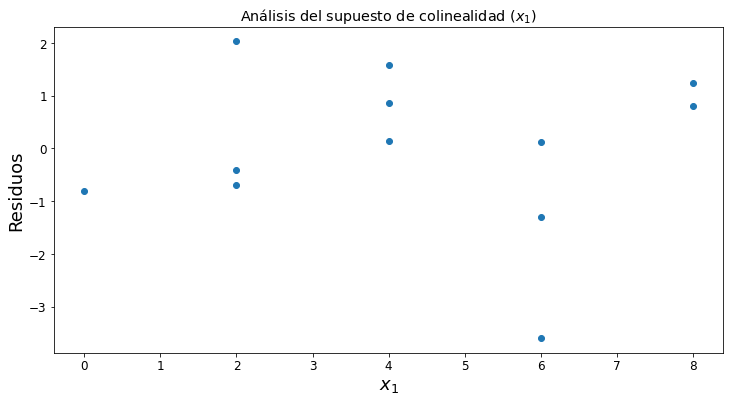

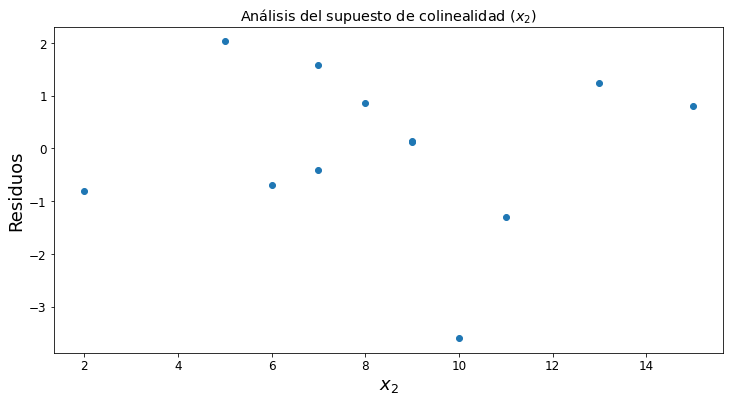

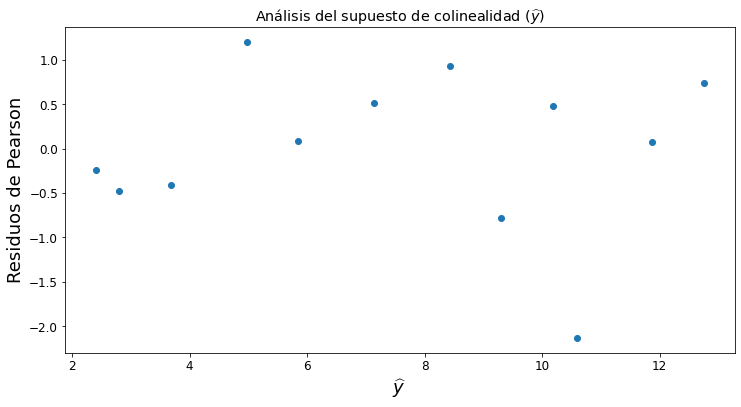

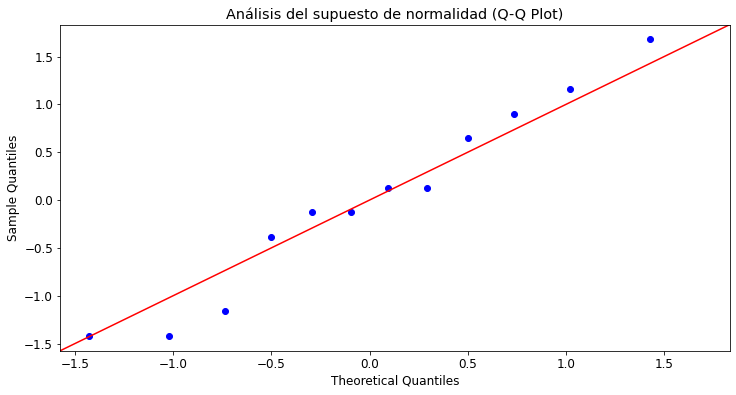

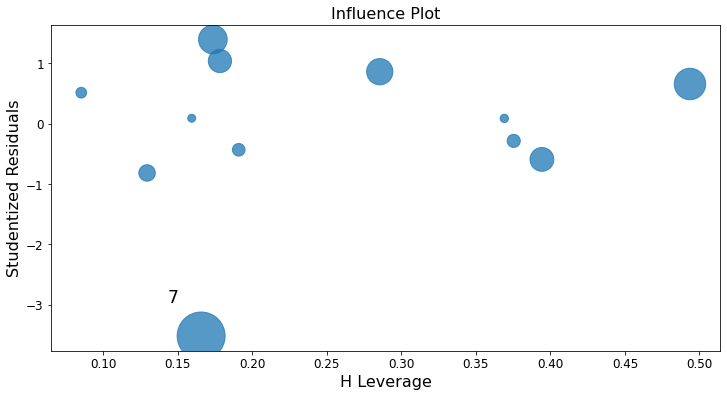

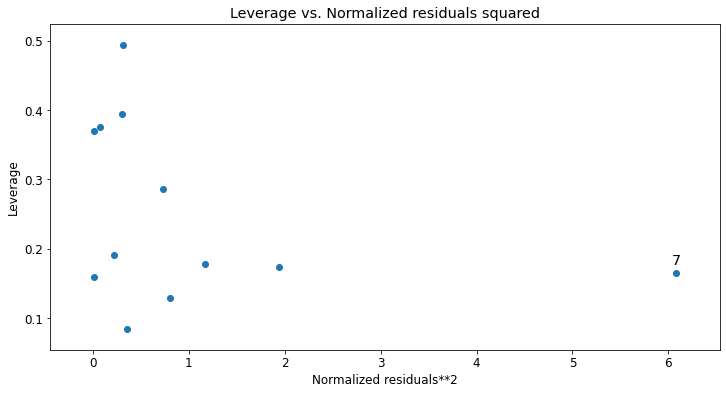

In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

plt.rc("figure", figsize=(12,6))
plt.rc("font", size=12)

influence = OLSInfluence(mod3)
print(influence.cooks_distance)
print(df)

df['res'] = mod3.resid

df_ord = df.sort_values(by=['x1'])
plt.figure()
plt.scatter(df_ord.x1, df_ord.res)
plt.title(r"Análisis del supuesto de colinealidad $(x_1)$")
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.show()

df_ord = df.sort_values(by=['x2'])
plt.figure()
plt.scatter(df_ord.x2, df_ord.res)
plt.title(r"Análisis del supuesto de colinealidad $(x_2)$")
plt.xlabel(r"$x_2$", fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.show()

df['res_p'] = mod3.resid_pearson
df['y_hat'] = mod3.fittedvalues

df_ord = df.sort_values(by=['y_hat'])
plt.figure()
plt.scatter(df_ord.y_hat, df_ord.res_p)
plt.title(r"Análisis del supuesto de colinealidad $(\widehat{y})$")
plt.xlabel(r"$\widehat{y}$", fontsize=18)
plt.ylabel("Residuos de Pearson", fontsize=18)
plt.show()

fig = sm.qqplot((df.y - df.y.mean())/df.y.std(),  line ='45')
plt.title("Análisis del supuesto de normalidad (Q-Q Plot)")
plt.show()

fig = sm.graphics.influence_plot(mod3, criterion="cooks")
#plt.title("Análisis de observaciones influyentes")
plt.show()

fig = sm.graphics.plot_leverage_resid2(mod3)
plt.show()


,y,x1,x2,res,res_p,y_hat
0,2,0,2,-0.804416,-0.478279,2.804416
1,3,2,6,-0.686120,-0.407944,3.686120
2,2,2,7,-0.400631,-0.238202,2.400631
3,7,2,5,2.028391,1.206014,4.971609
4,6,4,9,0.146688,0.087216,5.853312
5,8,4,8,0.861199,0.512040,7.138801
6,10,4,7,1.575710,0.936865,8.424290
8,8,6,11,-1.305994,-0.776501,9.305994
9,12,6,9,0.123028,0.073149,11.876972
10,11,8,15,0.812303,0.482968,10.187697


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     61.89
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           1.36e-05
Time:                        16:03:47   Log-Likelihood:                -15.084
No. Observations:                  11   AIC:                             36.17
Df Residuals:                       8   BIC:                             37.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0000      1.118      5.367      0.0

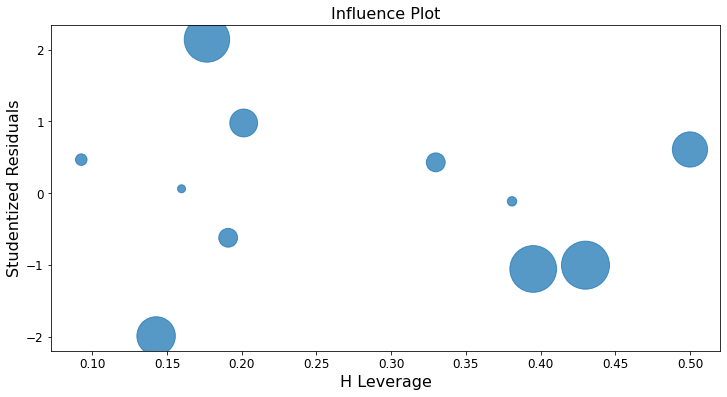

In [36]:
df2 = df[df.index != 7]
display(df2)
mod4 = smf.ols('y ~ x1 + x2', data=df2).fit()
print(mod4.summary(), "\n")

fig = sm.graphics.influence_plot(mod4, criterion="cooks")
plt.show()


# Tarea. Vapor de gasolina
Cuando se bombea gasolina al tanque de un automóvil, los vapores se ventilan a la atmósfera. Se realizó un experimento para determinar si $y$, la cantidad de vapor, se puede predecir utilizando las siguientes cuatro variables basadas en
las condiciones iniciales del tanque y la gasolina dispensada:
+ $x_1$: temperatura del tanque (Grados F)
+ $x_2$: temperatura de la gasolina (Grados F)
+ $x_3$: presión de vapor en el tanque (psi)
+ $x_4$: presión de vapor de gasolina (psi)

Los datos (tomados de Weisberg 1985, p. 138) se incluyen en el archivo vapor_data.csv.

Realice el análisis completo del conjunto mediante regresión lineal múltiple.